Contents:

- [Introduction](#Introduction)
- [Plots in state-space](#Plots-in-state-space)
- [Error bounds](#Error-bounds)

### Introduction

Consider the [Van der Pol equation](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator), which depends on two positive parameters $\mu$ and $\omega$:

In [1]:
from carlin.library import vanderpol
pretty_print(vanderpol(SR.var("mu"), SR.var("omega")).funcs())

[x1, -omega^2*x0 - (x0^2 - 1)*mu*x1]

Given numerical values of the parameters and initial conditions, we compute the Carleman linearized ODE at order $N$, solve the linear ODE and plot the result:

In [2]:
# initial condition
x0 = [0.0, 0.5]

# initial time
tini = 0

# final time
T = 10

# number of computation points
NPOINTS = 400

# parameters for vanderpol
mu = 0.6; omega=1.
vdp = vanderpol(mu, omega)

### Plots in state-space

Let us plot the solution of Carleman linearization for different orders:

/Users/forets/Tools/sage-master/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


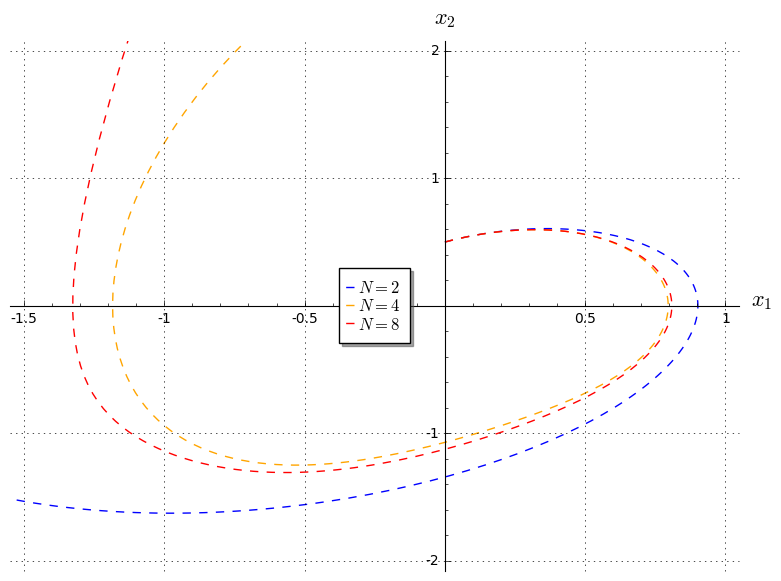

In [3]:
# plot min-max values
xmin=-1.5; xmax=1; ymin=-2; ymax=2

# solution using Carleman linearization of order N
from carlin.io import plot_truncated
Graphic = plot_truncated(vdp, 2, x0, tini, T, NPOINTS, gridlines=True, color="blue", linestyle="dashed", legend_label="$N=2$")
Graphic += plot_truncated(vdp, 4, x0, tini, T, NPOINTS, gridlines=True, color="orange", linestyle="dashed", legend_label="$N=4$")
Graphic += plot_truncated(vdp, 8, x0, tini, T, NPOINTS, gridlines=True, color="red", linestyle="dashed", legend_label="$N=8$")
Graphic.show(xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,gridlines=True, axes_labels = ['$x_1$', '$x_2$'])

We also plot the numerical solution obtained with a Runge-Kutta integration algorithm:

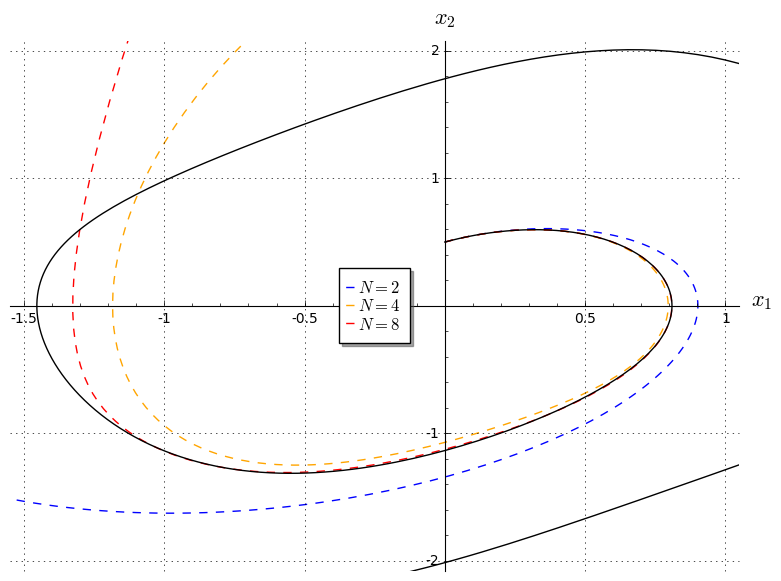

In [4]:
Graphic += vdp.plot_solution(x0, tini, T, NPOINTS, gridlines=True, color="black")
Graphic.show(xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,gridlines=True, axes_labels = ['$x_1$', '$x_2$'])

Finally, we include a streamline plot:

In [5]:
# streamline plot
(x, y) = var('x, y')
Graphic += streamline_plot((y, -x**2 * y*mu - x*omega^2 + y*mu), (x, xmin, xmax), (y, ymin, ymax), density=1, color='grey')

Let's display all the plots:

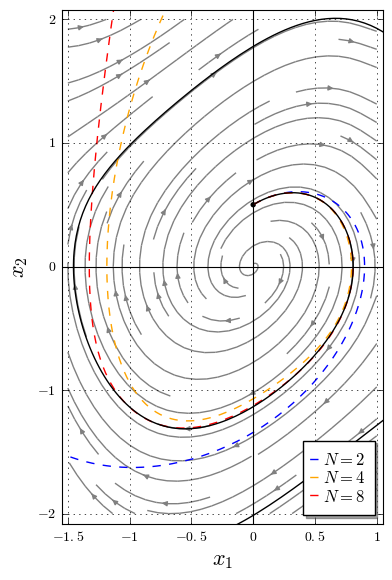

In [6]:
Graphic += point(x0, color="black", size=15)  # initial condition
Graphic.show(xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,gridlines=True,  
             axes_labels = ['$x_1$', '$x_2$'], aspect_ratio=1, legend_loc="lower right", 
             tick_formatter=[["$-1.5$","$-1$", "$-0.5$", "$0$", "$0.5$", "$1$"], 
                             ["$-2$","$-1$", "$0$", "$1$", "$2$"]],
            ticks=[[-1.5, -1, -0.5, 0, 0.5, 1], 
                   [-2, -1, 0, 1, 2]])

The figure format is guessed by the extension; `.png` is a possibility, but for better quality use `.pdf`.

In [8]:
Graphic.save("vanderpol_pp.pdf", aspect_ratio=1, gridlines=True, legend_loc="lower right",
             tick_formatter=[["$-1.5$","$-1$", "$-0.5$", "$0$", "$0.5$", "$1$"], 
                             ["$-2$","$-1$", "$0$", "$1$", "$2$"]],
             ticks=[[-1.5, -1, -0.5, 0, 0.5, 1], 
                   [-2, -1, 0, 1, 2]])

### Error bounds

Now we consider the error formula and compare the some simulations obtained with numerical integrator (Runge-Kutta) and the solution of the linarized system together with the error formula.

In [8]:
# select variable to plot
j = 1

# number of computation points
NPOINTS = 700

GraphicTime = Graphics()
T=5.0
# integrate nonlinear equation with RK
S = vdp.solve(x0, tini, T, NPOINTS)
x_t = lambda i : S.interpolate_solution(i)

x_vs_t = plot(x_t(j), tini, T, axes_labels = ["$t$", "$x_2$"], gridlines=True, color="black")
GraphicTime += x_vs_t 

In [9]:
# solution using Carleman linearization of order N
from carlin.io import solve_ode_exp
from carlin.transformation import truncated_matrix, get_Fj_from_model

Fjnk = get_Fj_from_model(vdp.funcs(), vdp.dim(), vdp.degree())

# time domain is the same for all of them
tdom = srange(tini, T, (T-tini)/(NPOINTS-1)*1., include_endpoint=True)

AN_sp = lambda N : truncated_matrix(N, *Fjnk, input_format="Fj_matrices")
sol = lambda N : solve_ode_exp(AN_sp(N), x0=x0, N=N, tini=tini, T=T, NPOINTS=NPOINTS)

#====
N = 2
GraphicTime += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, linestyle="dashed", color="blue", legend_label="$N=2$")

#====
N = 4
GraphicTime += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, color="orange", linestyle="dashed", legend_label="$N=4$")

#====
N = 8
GraphicTime += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, color="red", linestyle="dashed", legend_label="$N=8$")


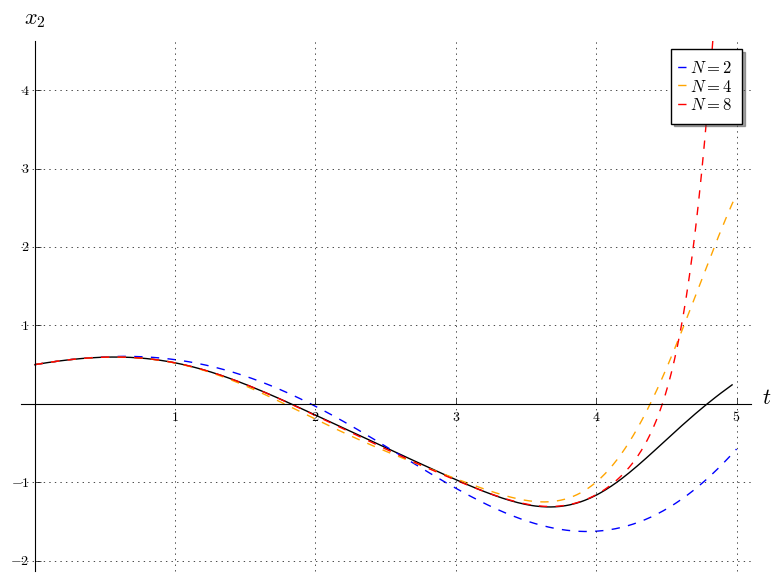

In [12]:
xmin=0; xmax=5; ymin=-2; ymax=4.5
GraphicTime.show(gridlines=True, axes_labels = ["$t$", "$x_2$"], 
                 xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,
                tick_formatter=[["$0$","$1$", "$2$", "$3$", "$4$", "$5$"], 
                             ["$-2$","$-1$", "$0$", "$1$", "$2$", "$3$", "$4$"]],
                ticks=[[0, 1, 2, 3, 4, 5], 
                   [-2, -1, 0, 1, 2, 3, 4]],
                legend_loc="upper right")

In [13]:
GraphicTime.save("vanderpol_time.pdf", gridlines=True, axes_labels = ["$t$", "$x_2$"], 
                 xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,
                tick_formatter=[["$0$","$1$", "$2$", "$3$", "$4$", "$5$"], 
                             ["$-2$","$-1$", "$0$", "$1$", "$2$", "$3$", "$4$"]],
                ticks=[[0, 1, 2, 3, 4, 5], 
                   [-2, -1, 0, 1, 2, 3, 4]],
                legend_loc="upper right")

Let us compute the error bound corresponding to $N=2$. 

In [15]:
from carlin.transformation import error_function
error_function(vdp, 2, x0)

[0.57682084078072837,
 0.5*(0.18749999999999997*e^(3.2*t) - 0.18749999999999997)^2*e^(3.2*t)/(-0.18749999999999997*e^(3.2*t) + 1.1875)]

In [19]:
error_tdom = lambda N: [error_function(vdp, N, x0)[1](t=ti) for ti in tdom]

GraphicTimeError = Graphics()

#====
N=2
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, linestyle="dashed", color="blue", legend_label="$N=2$")
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]+error_tdom(N)), plotjoined=True, linestyle="solid", color="blue")
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]-error_tdom(N)), plotjoined=True, linestyle="solid", color="blue")

#====
N=4
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, linestyle="dashed", color="orange", legend_label="$N=4$")
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]+error_tdom(N)), plotjoined=True, linestyle="solid", color="orange")
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]-error_tdom(N)), plotjoined=True, linestyle="solid", color="orange")

#====
N=8
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]), plotjoined=True, linestyle="dashed", color="red", legend_label="$N=8$")
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]+error_tdom(N)), plotjoined=True, linestyle="solid", color="red")
GraphicTimeError += list_plot(zip(tdom, sol(N)[:, j]-error_tdom(N)), plotjoined=True, linestyle="solid", color="red")


GraphicTimeError +=  plot(x_t(j), tini, T, axes_labels = ["$t$", "$x_1$"], gridlines=True, color="black")

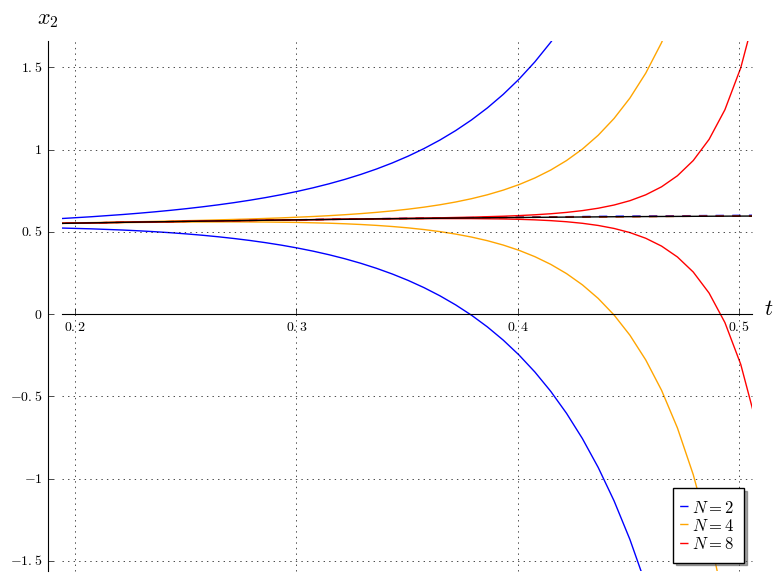

In [21]:
xmin=0.2; xmax=0.5; ymin=-1.5; ymax=1.6

sol_N_j_t = lambda N, j, t : sol(N)[ceil(t/(tdom[1]-tdom[0])), j] 

# Fill ?
#error_fill = plot(sol_N_j_t(8, j, t) + error_function_N(8), (t, xmin, xmax), fill=sol_N_j_t(8, j, t)-error_function_N(8), fillcolor="red", fillalpha=0.1, color="white")
#GraphicTimeError += error_fill

GraphicTimeError.show(gridlines=True, axes_labels = ["$t$", "$x_2$"], 
                 xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,
                tick_formatter=[["$0.2$","$0.3$", "$0.4$", "$0.5$"], 
                             ["$-1.5$","$-1$","$-0.5$", "$0$", "$0.5$", "$1$", "$1.5$"]],
                ticks=[[0.2, 0.3, 0.4, 0.5], 
                   [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]],
                legend_loc="lower right")

In [22]:
GraphicTimeError.save("vanderpol_error_x1t.pdf", gridlines=True, axes_labels = ["$t$", "$x_2$"], 
                 xmin=xmin, xmax=xmax, ymin=ymin,ymax=ymax,
                tick_formatter=[["$0.2$","$0.3$", "$0.4$", "$0.5$"], 
                             ["$-1.5$","$-1$","$-0.5$", "$0$", "$0.5$", "$1$", "$1.5$"]],
                ticks=[[0.2, 0.3, 0.4, 0.5], 
                   [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]],
                legend_loc="lower right")

---

In [206]:
error_fill = plot(0.5+error_function_N(8), (t, xmin, xmax), fill=0.5-error_function_N(8), fillcolor="red", fillalpha=0.1, color="white")

In [32]:
[F, n, k] = get_Fj_from_model(vdp.funcs(), vdp.dim(), vdp.degree())
from carlin.transformation import *
[Fquad, nquad, kquad] = quadratic_reduction(F, n, k)
ch = characteristics(Fquad, nquad, kquad)
norm_F1_tilde, norm_F2_tilde = ch['norm_Fi_inf']
norm_F1_tilde, norm_F2_tilde

(3.2000000000000002, 1.2)

In [35]:
x0_hat = [kron_power(x0, i+1) for i in range(k-1)]
#transform to flat list
x0_hat = [item for sublist in x0_hat for item in sublist]
x0_hat

[0.000000000000000,
 0.500000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.250000000000000]

In [36]:
norm_x0_hat = norm(x0_hat, ord=inf)
norm_x0_hat

0.5

In [43]:
beta0 = ch['beta0_const']*norm_x0_hat
beta0, norm_x0_hat*norm_F2_tilde/norm_F1_tilde

(0.18749999999999997, 0.18749999999999997)

In [39]:
Ts = 1/norm_F1_tilde*log(1+1/beta0); Ts

0.57682084078072837

In [44]:
N=2
t = SR.var('t')
error = norm_x0_hat*exp(norm_F1_tilde*t)/(1+beta0-beta0*exp(norm_F1_tilde*t))*(beta0*(exp(norm_F1_tilde*t)-1))**N
pretty_print(error)

0.5*(0.18749999999999997*e^(3.2*t) - 0.18749999999999997)^2*e^(3.2*t)/(-0.18749999999999997*e^(3.2*t) + 1.1875)

In [58]:
matrix(Fquad[0].toarray()).norm(p=oo)

3.2

In [59]:
matrix(Fquad[1].toarray()).norm(p=oo)

1.2

In [60]:
log_norm(matrix(Fquad[0].toarray()))

3.2

In [61]:
log_norm(matrix(Fquad[1].toarray()))

0.6

In [65]:
beta0 = norm_x0_hat*0.6/norm_F1_tilde
Ts = 1/norm_F1_tilde*log(1+1/beta0); Ts

0.76772992900665749